#### Biel González Garriga NIU:1551813

# Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from pandas_profiling import ProfileReport
from myLibrary.myFunctions import *
from myLibrary.datasetPreprocessing import *
import time

In [2]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import time
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [3]:
display(HTML("<style>.container {width:99% !important; }</style>"))

In [4]:
df = pd.read_csv('lol_ranked_games.csv', header=0, delimiter=',')
print("================================\n",
      "\tDataframe loaded\n",
      "================================\n")

 	Dataframe loaded



In [5]:
df,finishedGame_df=preProcessing(df)

 	Basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   242572 non-null  int64  
 1   gameDuration             242572 non-null  int64  
 2   hasWon                   242572 non-null  int64  
 3   frame                    242572 non-null  int64  
 4   goldDiff                 242572 non-null  int64  
 5   expDiff                  242572 non-null  int64  
 6   champLevelDiff           242572 non-null  float64
 7   isFirstTower             242572 non-null  int64  
 8   isFirstBlood             242572 non-null  int64  
 9   killedFireDrake          242572 non-null  int64  
 10  killedWaterDrake         242572 non-null  int64  
 11  killedAirDrake           242572 non-null  int64  
 12  killedEarthDrake         242572 non-null  int64  
 13  killedElderDrake         242572 non-nu

In [6]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,killedElemDrakes,lostElemDrakes,totalKilledObjectives,totalLostObjectives,totalGameKilledObjectives,totalLostTurrets,totalDestroyedTurrets,totalLostStructures,totalDestroyedStructures,totalGameDestroyedStructures
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,1.201701,1.257367,1.912838,2.038776,3.951614,1.559644,1.614317,1.693378,1.754028,3.447405
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,1.089356,1.107481,1.635977,1.723658,2.291629,1.716754,1.737716,1.992079,2.019381,3.045505
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,3.000000,6.000000,3.000000,3.000000,3.000000,3.000000,5.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,4.000000,4.000000,11.000000,11.000000,14.000000,8.000000,8.000000,14.000000,14.000000,21.000000


A partir d'aqui es faran servir només dos models, ja que aquests son els que millors resultats donaven amb el model complet i a la vegada eren mes rapids. La logística i el RFC.

Es faran servir 4 frames diferents de la partida i despres el moment final de totes per fer una comparació. 

S'han escollit els següents frames:
* 10: es el inici de la conta de frames
* 14: quartil 25 dels frames al df complet
* 18: quartil 50 dels frames al df complet
* 24: quartil 75 dels frames al df complet

S'han de tenir en consideració els següents fets:
* La majoria de partides arriben a les tres primeres mesures de frames, però a la ultima no
* Donat el fet anterior només agafarem les partides que sí continguin aquell frame per veure així les dades de diferents frames, ja que suposarem que una partida al frame 24 està més a prop d'acabar que una al 18, per molt que algunes ja hagin acabat

Posteriorment es repetira el mateix pero eliminant quatre features més dominants i canviant la logística pel GBC.

Les features més dominants que faciliten el model son:
* goldDiff
* expDiff
* champLevelDiff
* KDA (feature creada, no original)

### Model complet

In [7]:
Ini_df= df[df["frame"]==10]
Quart_df = df[df["frame"]==14]
TwoQuart_df = df[df["frame"]==18]
ThreeQuart_df = df[df["frame"]==24]

In [8]:
modelsQuartils={}

#### Frame 10

In [9]:
train,test=train_test_split(Ini_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: LogisticRegression
Training time is:  0.12570738792419434 s
Base sklearn score is:  0.7302829620710415
ROC score is:  0.8044347784060702
F1 score is: 0.730886764817427
Accuracy score is: 0.7308850090307044
Precision score is: 0.7309314379738151


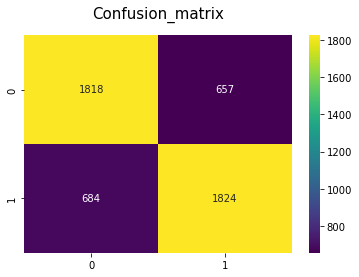

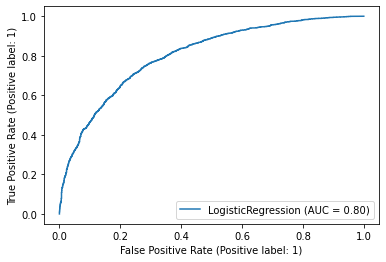

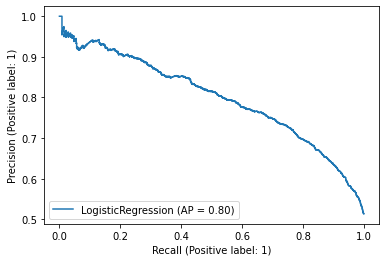

In [10]:
results=fullModelClassification(LogisticRegression(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 0"]=results[1]

Model: RandomForestClassifier
Training time is:  2.2617084980010986 s
Base sklearn score is:  0.7272727272727273
ROC score is:  0.8138433779582105
F1 score is: 0.7258663169896954
Accuracy score is: 0.725867951033514
Precision score is: 0.7258656184294444


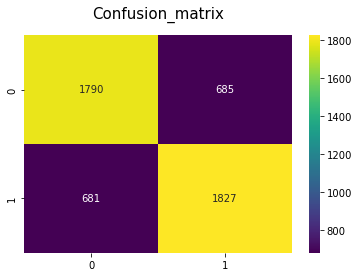

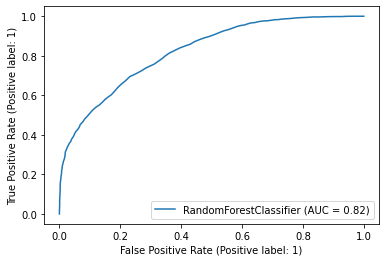

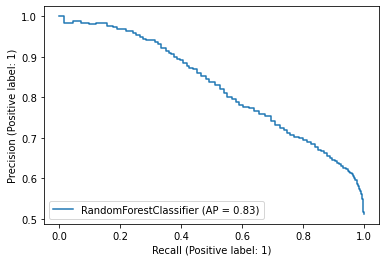

In [11]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 0"]=results[1]

#### Frame 14

In [12]:
train,test=train_test_split(Quart_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: LogisticRegression
Training time is:  0.11518287658691406 s
Base sklearn score is:  0.7710355987055016
ROC score is:  0.8525442506840526
F1 score is: 0.7716231000138476
Accuracy score is: 0.7716423948220065
Precision score is: 0.7716811684704404


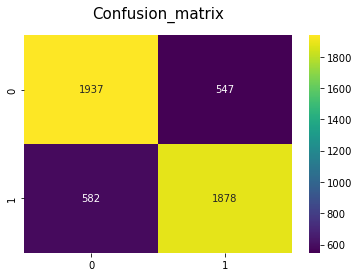

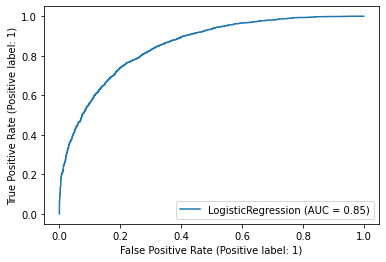

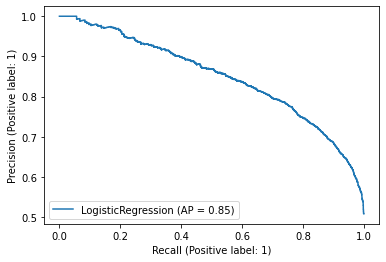

In [13]:
results=fullModelClassification(LogisticRegression(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 1"]=results[1]

Model: RandomForestClassifier
Training time is:  2.239060163497925 s
Base sklearn score is:  0.7645631067961165
ROC score is:  0.8630218765955775
F1 score is: 0.7641474598458999
Accuracy score is: 0.76415857605178
Precision score is: 0.7641723632970792


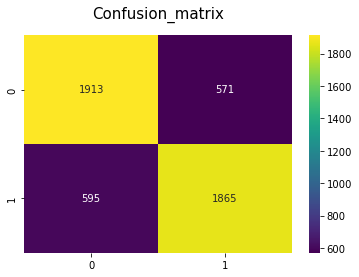

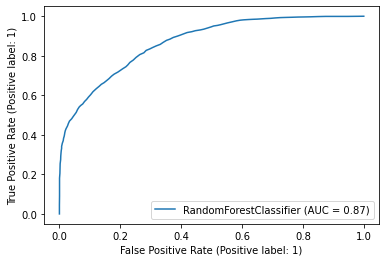

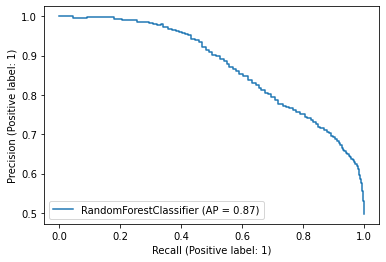

In [14]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 1"]=results[1]

#### Frame 18

In [15]:
train,test=train_test_split(TwoQuart_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: LogisticRegression
Training time is:  0.11046552658081055 s
Base sklearn score is:  0.7936406316688007
ROC score is:  0.880111774058858
F1 score is: 0.7925690888839804
Accuracy score is: 0.7925736235595391
Precision score is: 0.7925717736771661


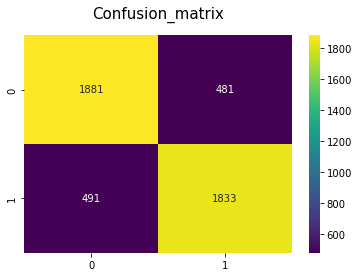

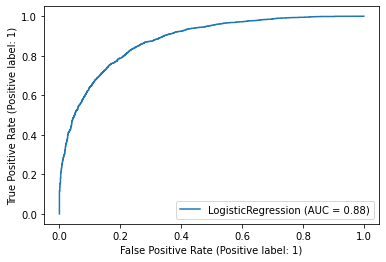

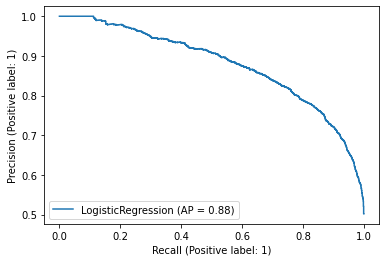

In [16]:
results=fullModelClassification(LogisticRegression(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 2"]=results[1]

Model: RandomForestClassifier
Training time is:  2.1403768062591553 s
Base sklearn score is:  0.8006828851899275
ROC score is:  0.8953293213983308
F1 score is: 0.7987573304323521
Accuracy score is: 0.7987622705932566
Precision score is: 0.7987611941274345


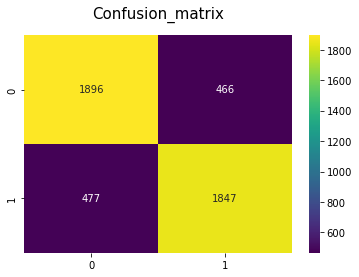

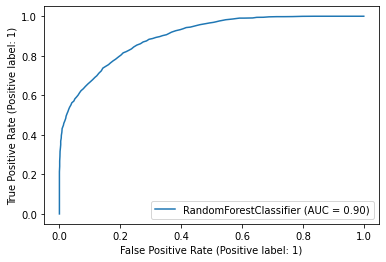

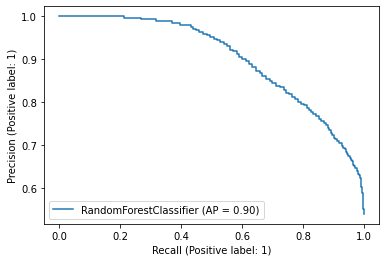

In [17]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 2"]=results[1]

#### Frame 24

In [18]:
train,test=train_test_split(ThreeQuart_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: LogisticRegression
Training time is:  0.13806891441345215 s
Base sklearn score is:  0.8217321997874601
ROC score is:  0.9060560558864104
F1 score is: 0.8227848747821777
Accuracy score is: 0.8227948990435706
Precision score is: 0.8227842627376273


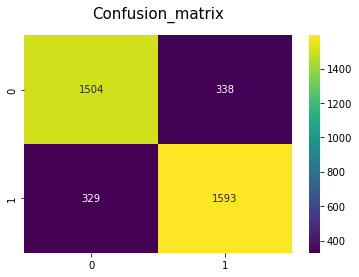

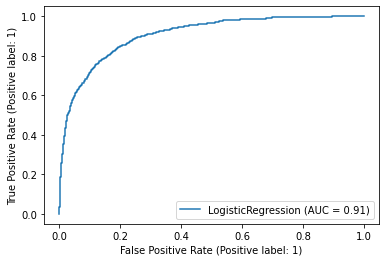

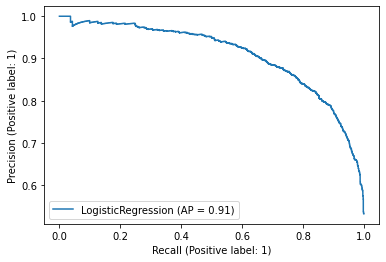

In [19]:
results=fullModelClassification(LogisticRegression(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 3"]=results[1]

Model: RandomForestClassifier
Training time is:  1.6496317386627197 s
Base sklearn score is:  0.823326248671626
ROC score is:  0.9169395230493028
F1 score is: 0.8204017457914115
Accuracy score is: 0.820403825717322
Precision score is: 0.8204001292520098


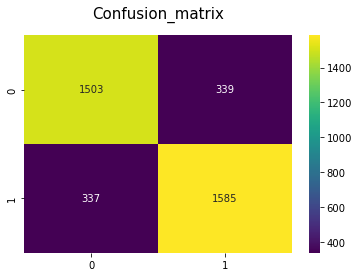

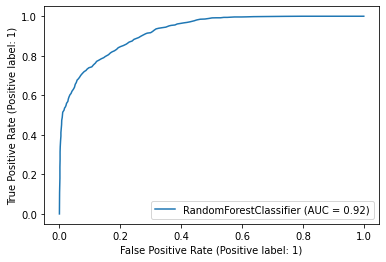

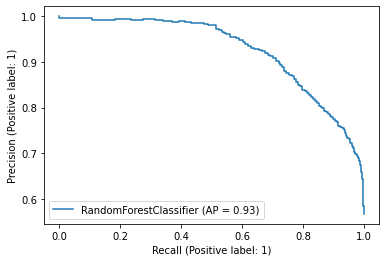

In [20]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 3"]=results[1]

#### Final de totes les partides

In [21]:
train,test=train_test_split(finishedGame_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: LogisticRegression
Training time is:  0.15458130836486816 s
Base sklearn score is:  0.9747140276941602
ROC score is:  0.9971053437082145
F1 score is: 0.9755167569737107
Accuracy score is: 0.9755167569737107
Precision score is: 0.9755167569737107


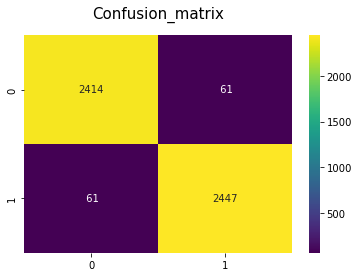

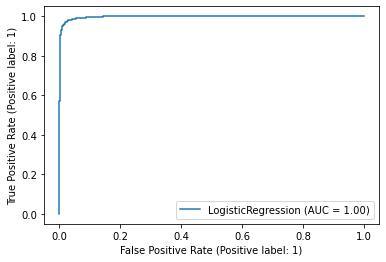

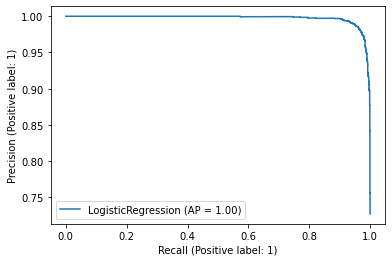

In [22]:
results=fullModelClassification(LogisticRegression(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" L"]=results[1]

Model: RandomForestClassifier
Training time is:  1.8071088790893555 s
Base sklearn score is:  0.9867549668874173
ROC score is:  0.9988345979733539
F1 score is: 0.984346905133605
Accuracy score is: 0.9843467790487658
Precision score is: 0.9843521055761962


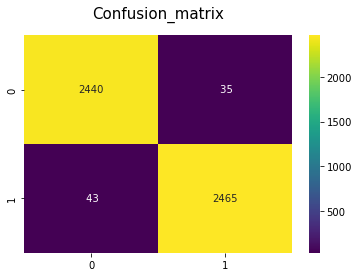

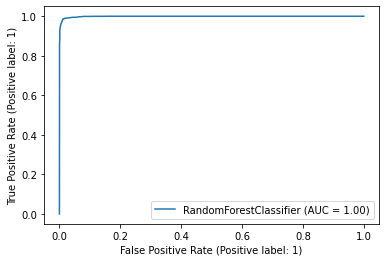

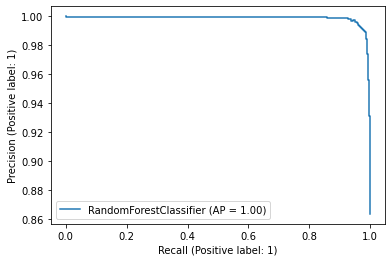

In [23]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" L"]=results[1]

#### Comparativa de mètriques dels diferents frames

In [24]:
keys=modelsQuartils.keys()
LogData=[modelsQuartils[key][2] for key in keys if ('Logistic' in key)]
RFCData=[modelsQuartils[key][2] for key in keys if ('Random' in key)]

##### Logística

In [25]:
score=[data['score'] for data in LogData]
ROC=[data['ROC'] for data in LogData]
F1=[data['F1'] for data in LogData]
Accuracy=[data['Accuracy'] for data in LogData]
Precision=[data['Precision'] for data in LogData]

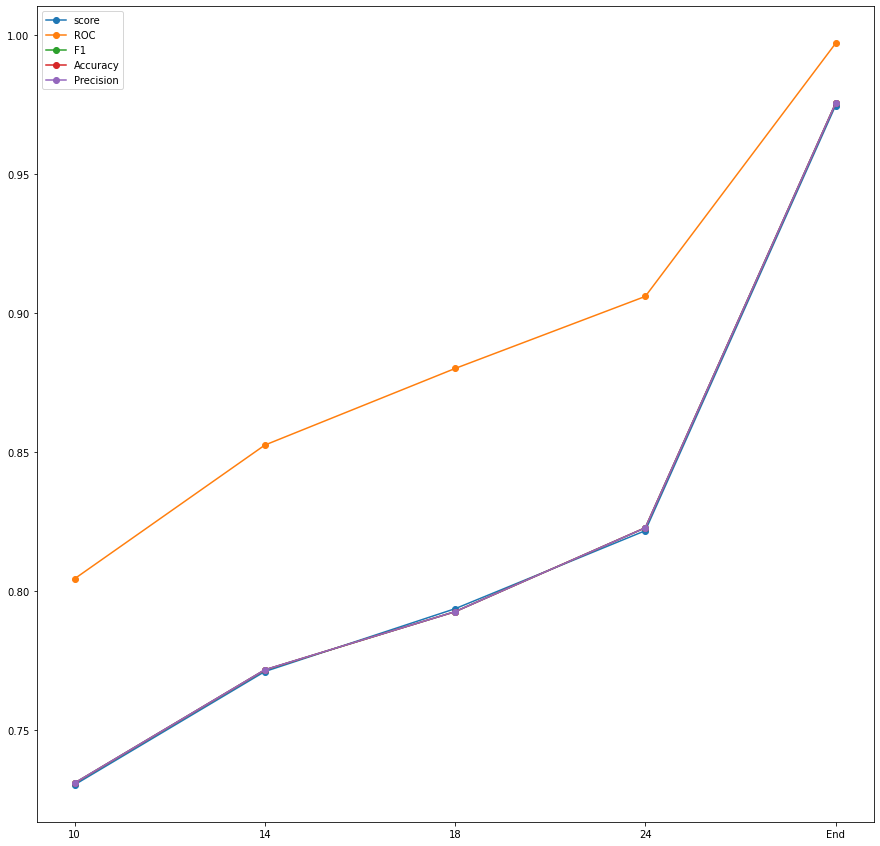

In [26]:
plt.figure(figsize=(15,15))
plt.xticks([0,1,2,3,4],["10","14","18","24","End"])
plt.plot(np.arange(5),score,marker='o',label='score')
plt.plot(np.arange(5),ROC,marker='o',label='ROC')
plt.plot(np.arange(5),F1,marker='o',label='F1')
plt.plot(np.arange(5),Accuracy,marker='o',label='Accuracy')
plt.plot(np.arange(5),Precision,marker='o',label='Precision')
plt.legend()

##### RFC

In [27]:
score=[data['score'] for data in RFCData]
ROC=[data['ROC'] for data in RFCData]
F1=[data['F1'] for data in RFCData]
Accuracy=[data['Accuracy'] for data in RFCData]
Precision=[data['Precision'] for data in RFCData]

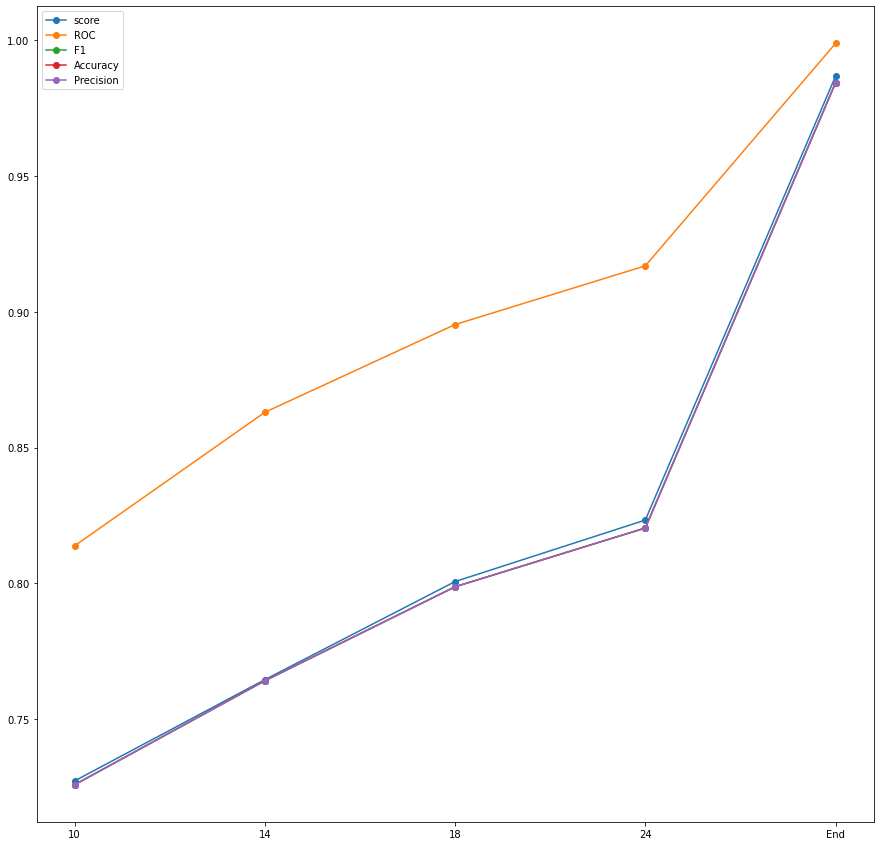

In [28]:
plt.figure(figsize=(15,15))
plt.xticks([0,1,2,3,4],["10","14","18","24","End"])
plt.plot(np.arange(5),score,marker='o',label='score')
plt.plot(np.arange(5),ROC,marker='o',label='ROC')
plt.plot(np.arange(5),F1,marker='o',label='F1')
plt.plot(np.arange(5),Accuracy,marker='o',label='Accuracy')
plt.plot(np.arange(5),Precision,marker='o',label='Precision')
plt.legend()

### Models sense 4 features

In [29]:
df2=df.drop(["goldDiff","expDiff","champLevelDiff","KDA"],axis=1)
finishedGame_df2=finishedGame_df.drop(["goldDiff","expDiff","champLevelDiff","KDA"],axis=1)

In [30]:
Ini_df= df2[df2["frame"]==10]
Quart_df = df2[df2["frame"]==14]
TwoQuart_df = df2[df2["frame"]==18]
ThreeQuart_df = df2[df2["frame"]==24]

In [31]:
modelsQuartils={}

#### Frame 10

In [32]:
train,test=train_test_split(Ini_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: GradientBoostingClassifier
Training time is:  2.826195478439331 s
Base sklearn score is:  0.7176399759181216
ROC score is:  0.7994449277463631
F1 score is: 0.7039939596593559
Accuracy score is: 0.7039935781657636
Precision score is: 0.7039943978576277


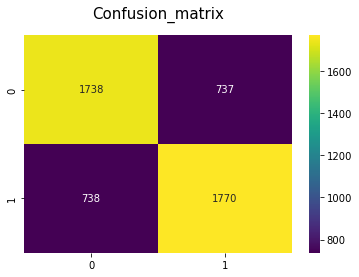

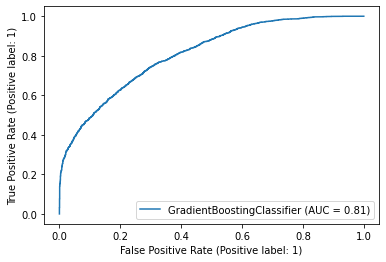

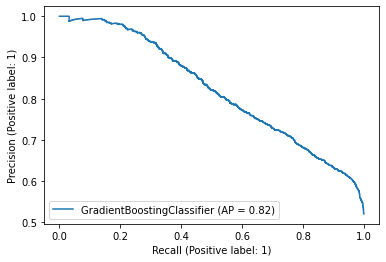

In [33]:
results=fullModelClassification(GradientBoostingClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 0"]=results[1]

Model: RandomForestClassifier
Training time is:  2.147331714630127 s
Base sklearn score is:  0.7013847080072245
ROC score is:  0.7755545084013984
F1 score is: 0.6945639694018803
Accuracy score is: 0.6945615091310455
Precision score is: 0.6945700101084727


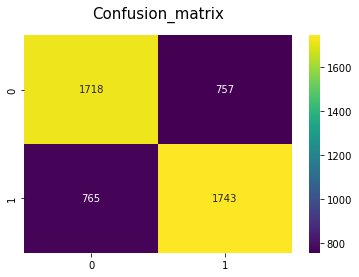

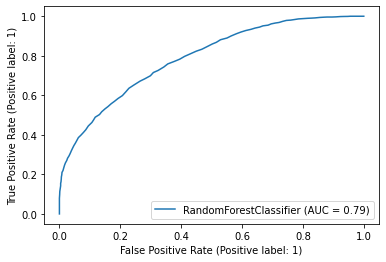

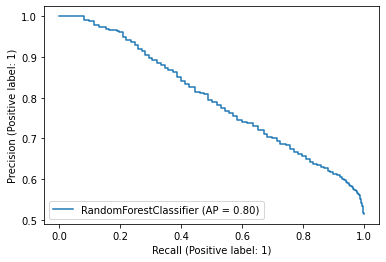

In [34]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 0"]=results[1]

#### Frame 14

In [35]:
train,test=train_test_split(Quart_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: GradientBoostingClassifier
Training time is:  3.5141611099243164 s
Base sklearn score is:  0.7591019417475728
ROC score is:  0.8514833961745415
F1 score is: 0.7524245914560219
Accuracy score is: 0.7524271844660194
Precision score is: 0.7524259387749981


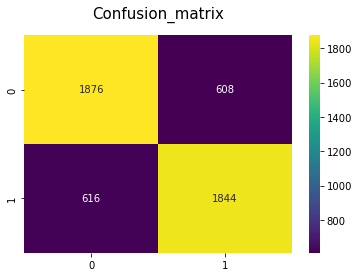

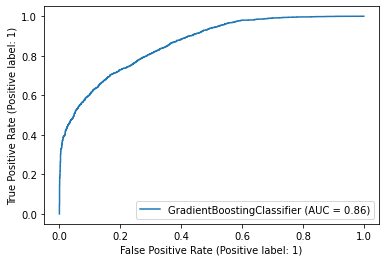

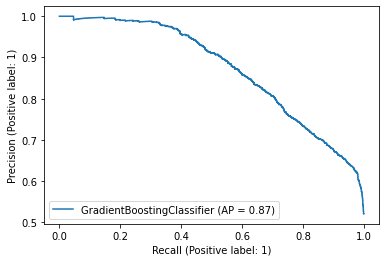

In [36]:
results=fullModelClassification(GradientBoostingClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 1"]=results[1]

Model: RandomForestClassifier
Training time is:  1.8937413692474365 s
Base sklearn score is:  0.7439320388349514
ROC score is:  0.8344708573897333
F1 score is: 0.7444988497436211
Accuracy score is: 0.7445388349514563
Precision score is: 0.7446173870734215


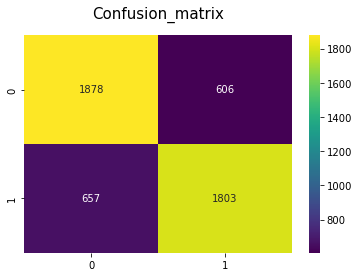

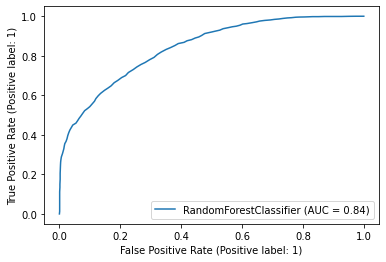

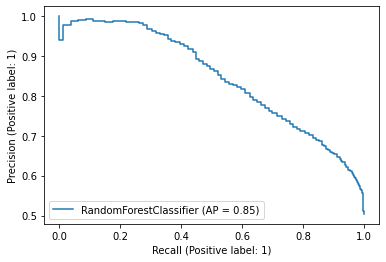

In [37]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 1"]=results[1]

#### Frame 18

In [38]:
train,test=train_test_split(TwoQuart_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: GradientBoostingClassifier
Training time is:  3.887887477874756 s
Base sklearn score is:  0.7851045667947076
ROC score is:  0.8846655522537714
F1 score is: 0.7789009356194524
Accuracy score is: 0.7789159197609902
Precision score is: 0.7789268241724472


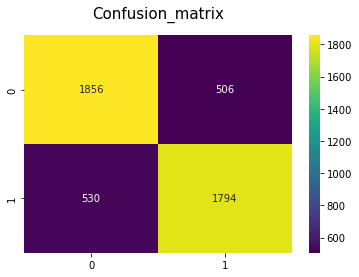

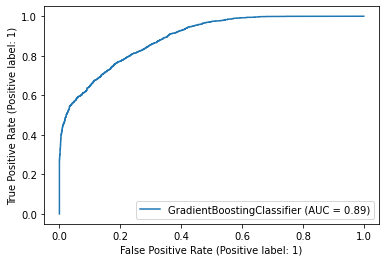

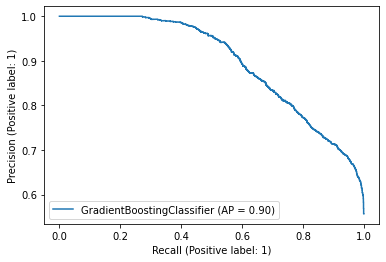

In [39]:
results=fullModelClassification(GradientBoostingClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 2"]=results[1]

Model: RandomForestClassifier
Training time is:  1.8294036388397217 s
Base sklearn score is:  0.7819035424669227
ROC score is:  0.8730369038753296
F1 score is: 0.7780489697163112
Accuracy score is: 0.7780623132735809
Precision score is: 0.7780699321603115


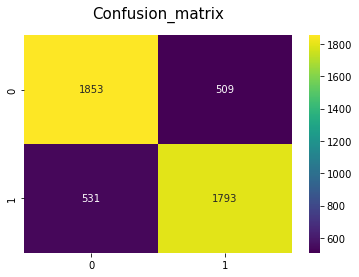

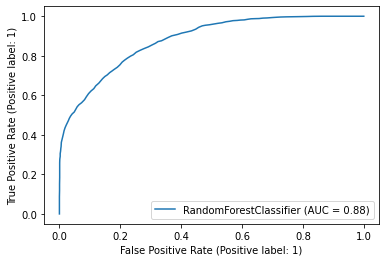

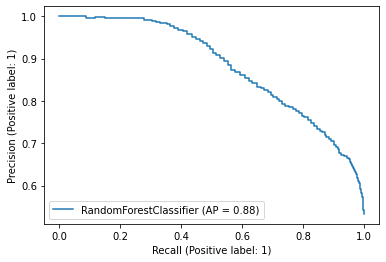

In [40]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 2"]=results[1]

#### Frame 24

In [41]:
train,test=train_test_split(ThreeQuart_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: GradientBoostingClassifier
Training time is:  3.753955125808716 s
Base sklearn score is:  0.8028692879914984
ROC score is:  0.9058896869326084
F1 score is: 0.8031238264071868
Accuracy score is: 0.803134962805526
Precision score is: 0.8031218770079757


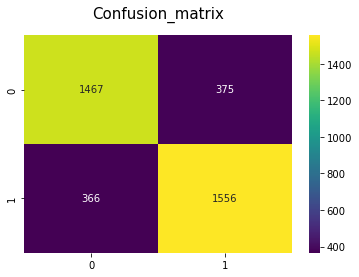

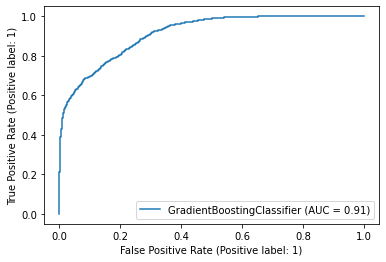

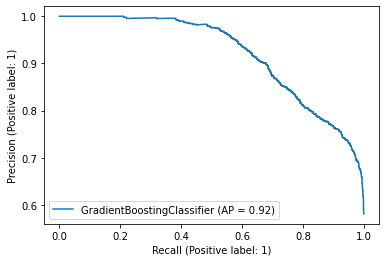

In [42]:
results=fullModelClassification(GradientBoostingClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 3"]=results[1]

Model: RandomForestClassifier
Training time is:  1.6424291133880615 s
Base sklearn score is:  0.8071200850159405
ROC score is:  0.9009727640747005
F1 score is: 0.8017818952118911
Accuracy score is: 0.8018065887353879
Precision score is: 0.8017938960238441


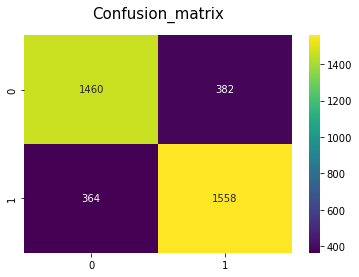

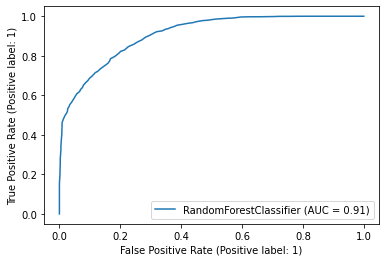

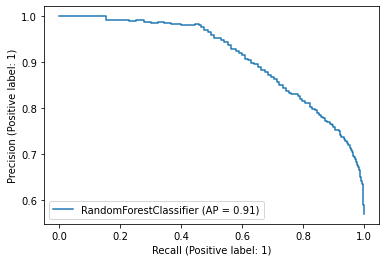

In [43]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" 3"]=results[1]

#### Final de totes les partides

In [44]:
train,test=train_test_split(finishedGame_df2,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

Model: GradientBoostingClassifier
Training time is:  5.7961461544036865 s
Base sklearn score is:  0.9765201685731487
ROC score is:  0.9968578931258357
F1 score is: 0.9741120140990215
Accuracy score is: 0.9741119807344973
Precision score is: 0.9741121259280038


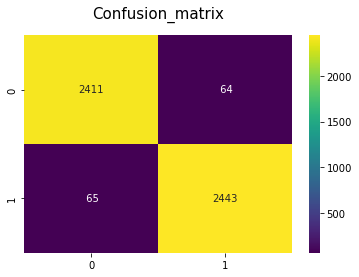

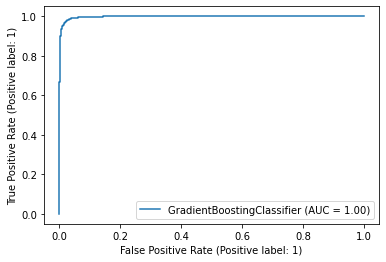

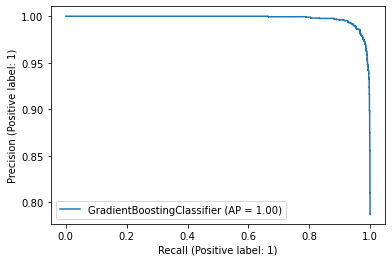

In [45]:
results=fullModelClassification(GradientBoostingClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" L"]=results[1]

Model: RandomForestClassifier
Training time is:  1.814002275466919 s
Base sklearn score is:  0.9741119807344973
ROC score is:  0.9960734135614518
F1 score is: 0.9713023889587885
Accuracy score is: 0.9713024282560706
Precision score is: 0.971302427900438


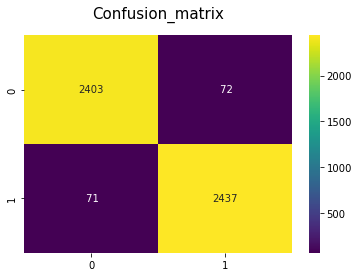

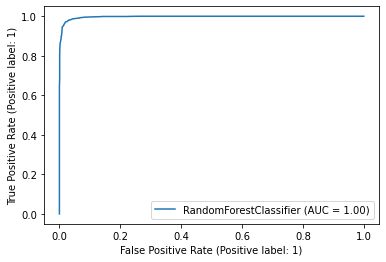

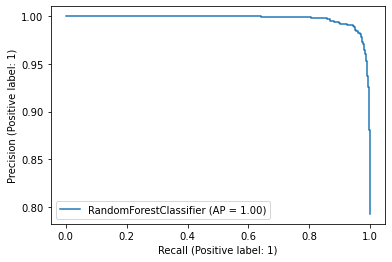

In [46]:
results=fullModelClassification(RandomForestClassifier(),X_train,Y_train,X_test,Y_test,True)
modelsQuartils[results[0]+" L"]=results[1]

#### Comparativa de mètriques dels diferents frames

In [47]:
keys=modelsQuartils.keys()
LogData=[modelsQuartils[key][2] for key in keys if ('Gradient' in key)]
RFCData=[modelsQuartils[key][2] for key in keys if ('Random' in key)]

##### GBC

In [48]:
score=[data['score'] for data in LogData]
ROC=[data['ROC'] for data in LogData]
F1=[data['F1'] for data in LogData]
Accuracy=[data['Accuracy'] for data in LogData]
Precision=[data['Precision'] for data in LogData]

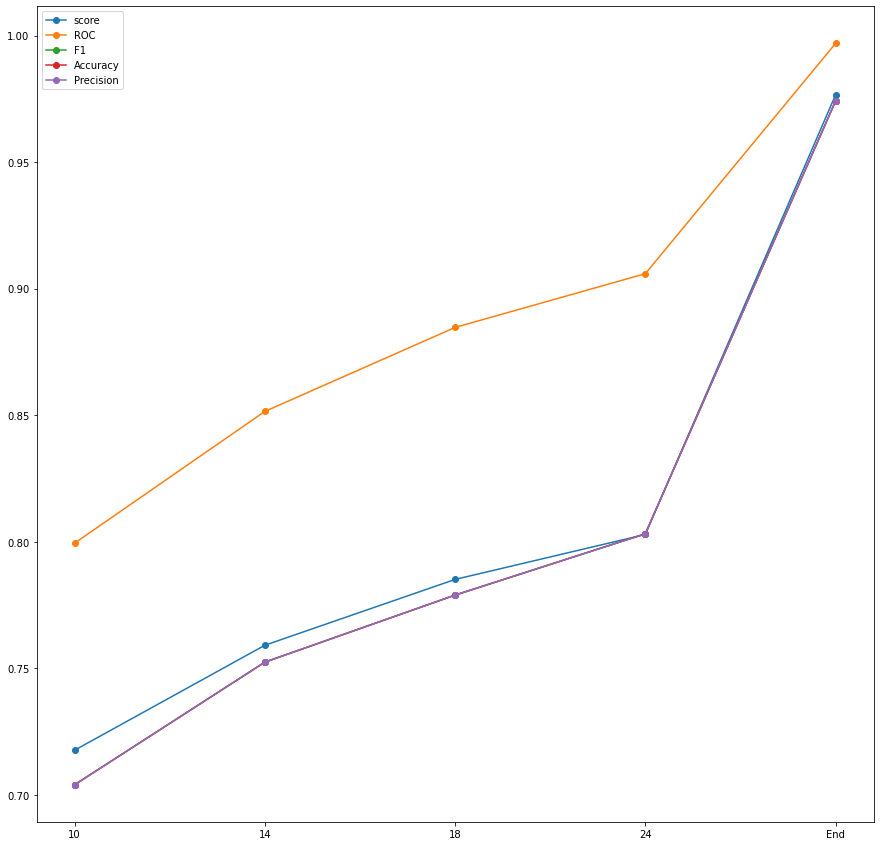

In [49]:
plt.figure(figsize=(15,15))
plt.xticks([0,1,2,3,4],["10","14","18","24","End"])
plt.plot(np.arange(5),score,marker='o',label='score')
plt.plot(np.arange(5),ROC,marker='o',label='ROC')
plt.plot(np.arange(5),F1,marker='o',label='F1')
plt.plot(np.arange(5),Accuracy,marker='o',label='Accuracy')
plt.plot(np.arange(5),Precision,marker='o',label='Precision')
plt.legend()

##### RFC

In [50]:
score=[data['score'] for data in RFCData]
ROC=[data['ROC'] for data in RFCData]
F1=[data['F1'] for data in RFCData]
Accuracy=[data['Accuracy'] for data in RFCData]
Precision=[data['Precision'] for data in RFCData]

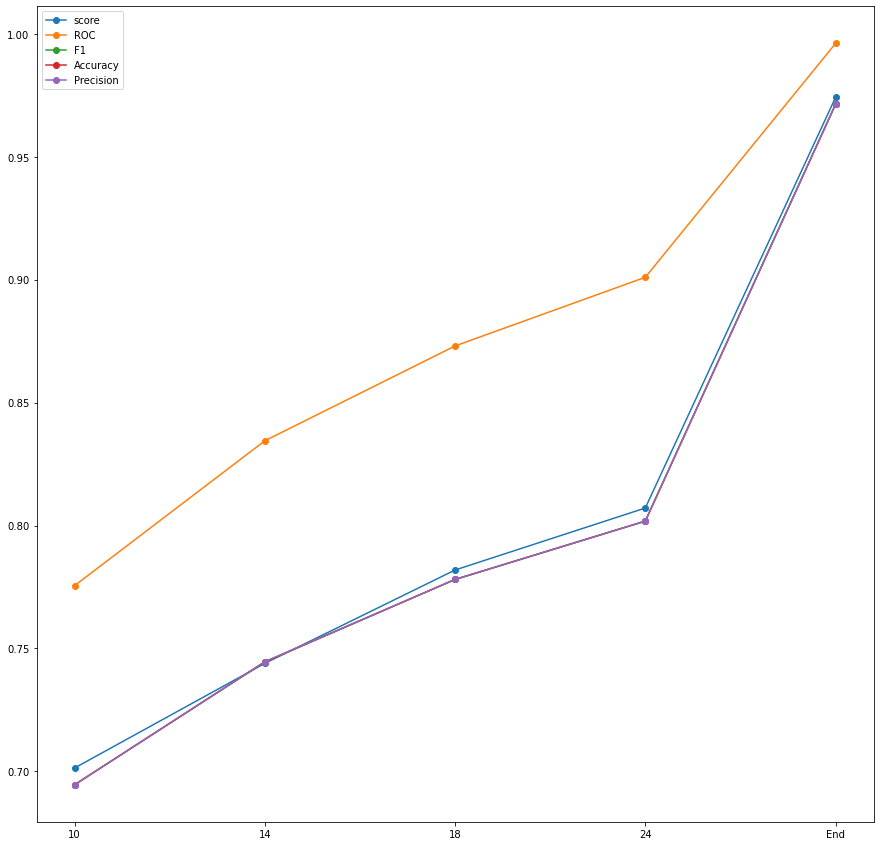

In [51]:
plt.figure(figsize=(15,15))
plt.xticks([0,1,2,3,4],["10","14","18","24","End"])
plt.plot(np.arange(5),score,marker='o',label='score')
plt.plot(np.arange(5),ROC,marker='o',label='ROC')
plt.plot(np.arange(5),F1,marker='o',label='F1')
plt.plot(np.arange(5),Accuracy,marker='o',label='Accuracy')
plt.plot(np.arange(5),Precision,marker='o',label='Precision')
plt.legend()